It is difficult to determine the authenticity of an Instagram account with complete certainty. We are training a basic nn for numerical dataset available on kaggle as it was a large dataset but it didn't contain any textual information like username and bio, we have thought of combining this model trained solely on numerical columns to help give us robust predictions based on a few characteristics:

1. The number of followers the account has
2. The ratio of followers to following
3. The age of the account (but this data could not be extracted while scraping)
4. The amount of activity on the account (e.g. number of posts)
5. The presence of a profile picture and biography
6. The use of third-party apps to boost the account's activity

Using these and other relevant features, it is possible to train a machine learning model to predict the likelihood that an Instagram account is fake based solely on numerical data.
 However, it is important to note that building an accurate fake Instagram account detection model would likely require a large and diverse dataset of real and fake accounts, as well as careful feature engineering and model selection. It would also be important to continuously update the model as fake accounts evolve and change over time.

In [48]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix

In [49]:
import warnings

warnings.filterwarnings("ignore")


def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    fxn()


In [50]:
df_train=pd.read_csv('/Users/apoorvaneha/Desktop/minor project/project 2025/archive (9)/train.csv')
df_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [51]:
# Load the testing data
df_test=pd.read_csv('/Users/apoorvaneha/Desktop/minor project/project 2025/archive (9)/test.csv')
df_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


# Statistical Analysis

In [52]:
df_train.drop('name==username',axis=1,inplace=True)
df_train.drop('external URL',axis=1,inplace=True)
df_train.drop('fullname words',axis=1,inplace=True)
df_train.drop('profile pic',axis=1,inplace=True)


In [53]:
df_test.drop('name==username',axis=1,inplace=True)
df_test.drop('external URL',axis=1,inplace=True)
df_test.drop('fullname words',axis=1,inplace=True)
df_test.drop('profile pic',axis=1,inplace=True)

In [54]:
df_train.head()

,nums/length username,nums/length fullname,description length,private,#posts,#followers,#follows,fake
0,0.27,0.0,53,0,32,1000,955,0
1,0.00,0.0,44,0,286,2740,533,0
2,0.10,0.0,0,1,13,159,98,0
3,0.00,0.0,82,0,679,414,651,0
4,0.00,0.0,0,1,6,151,126,0


In [55]:
df_train.tail()

,nums/length username,nums/length fullname,description length,private,#posts,#followers,#follows,fake
571,0.55,0.44,0,0,33,166,596,1
572,0.38,0.33,21,0,44,66,75,1
573,0.57,0.00,0,0,4,96,339,1
574,0.57,0.00,11,0,0,57,73,1
575,0.27,0.00,0,0,2,150,487,1


In [56]:
# Getting dataframe info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   nums/length username  576 non-null    float64
 1   nums/length fullname  576 non-null    float64
 2   description length    576 non-null    int64  
 3   private               576 non-null    int64  
 4   #posts                576 non-null    int64  
 5   #followers            576 non-null    int64  
 6   #follows              576 non-null    int64  
 7   fake                  576 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 36.1 KB


In [57]:
# Get the statistical summary of the dataframe
df_train.describe()

,nums/length username,nums/length fullname,description length,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.163837,0.036094,22.623264,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.214096,0.125121,37.702987,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,0.310000,0.000000,34.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,0.920000,1.000000,150.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [58]:
# Checking if null values exist
df_train.isnull().sum()

nums/length username    0
nums/length fullname    0
description length      0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [59]:
# Get the number of unique values in "fake" (Target column)
df_train['fake'].value_counts()

fake
0    288
1    288
Name: count, dtype: int64

# Data Visualization

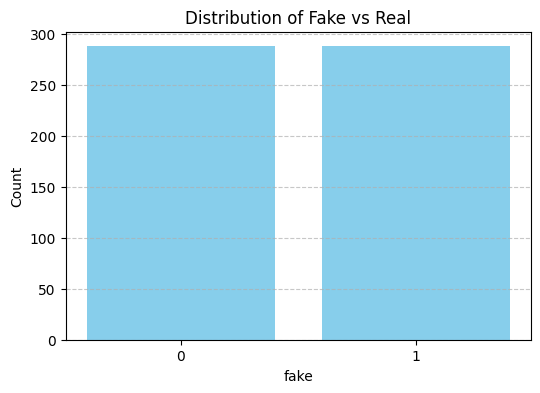

In [60]:
counts =df_train['fake'].value_counts().sort_index()

# Plot using matplotlib
plt.figure(figsize=(6, 4))
plt.bar(counts.index.astype(str), counts.values, color='skyblue')
plt.xlabel('fake')
plt.ylabel('Count')
plt.title('Distribution of Fake vs Real')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


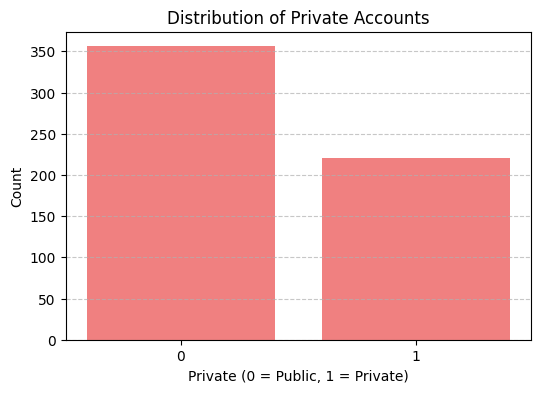

In [61]:
# Count the values in the 'private' column
private_counts = df_train['private'].value_counts().sort_index()

# Plot using matplotlib
plt.figure(figsize=(6, 4))
plt.bar(private_counts.index.astype(str), private_counts.values, color='lightcoral')
plt.xlabel('Private (0 = Public, 1 = Private)')
plt.ylabel('Count')
plt.title('Distribution of Private Accounts')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

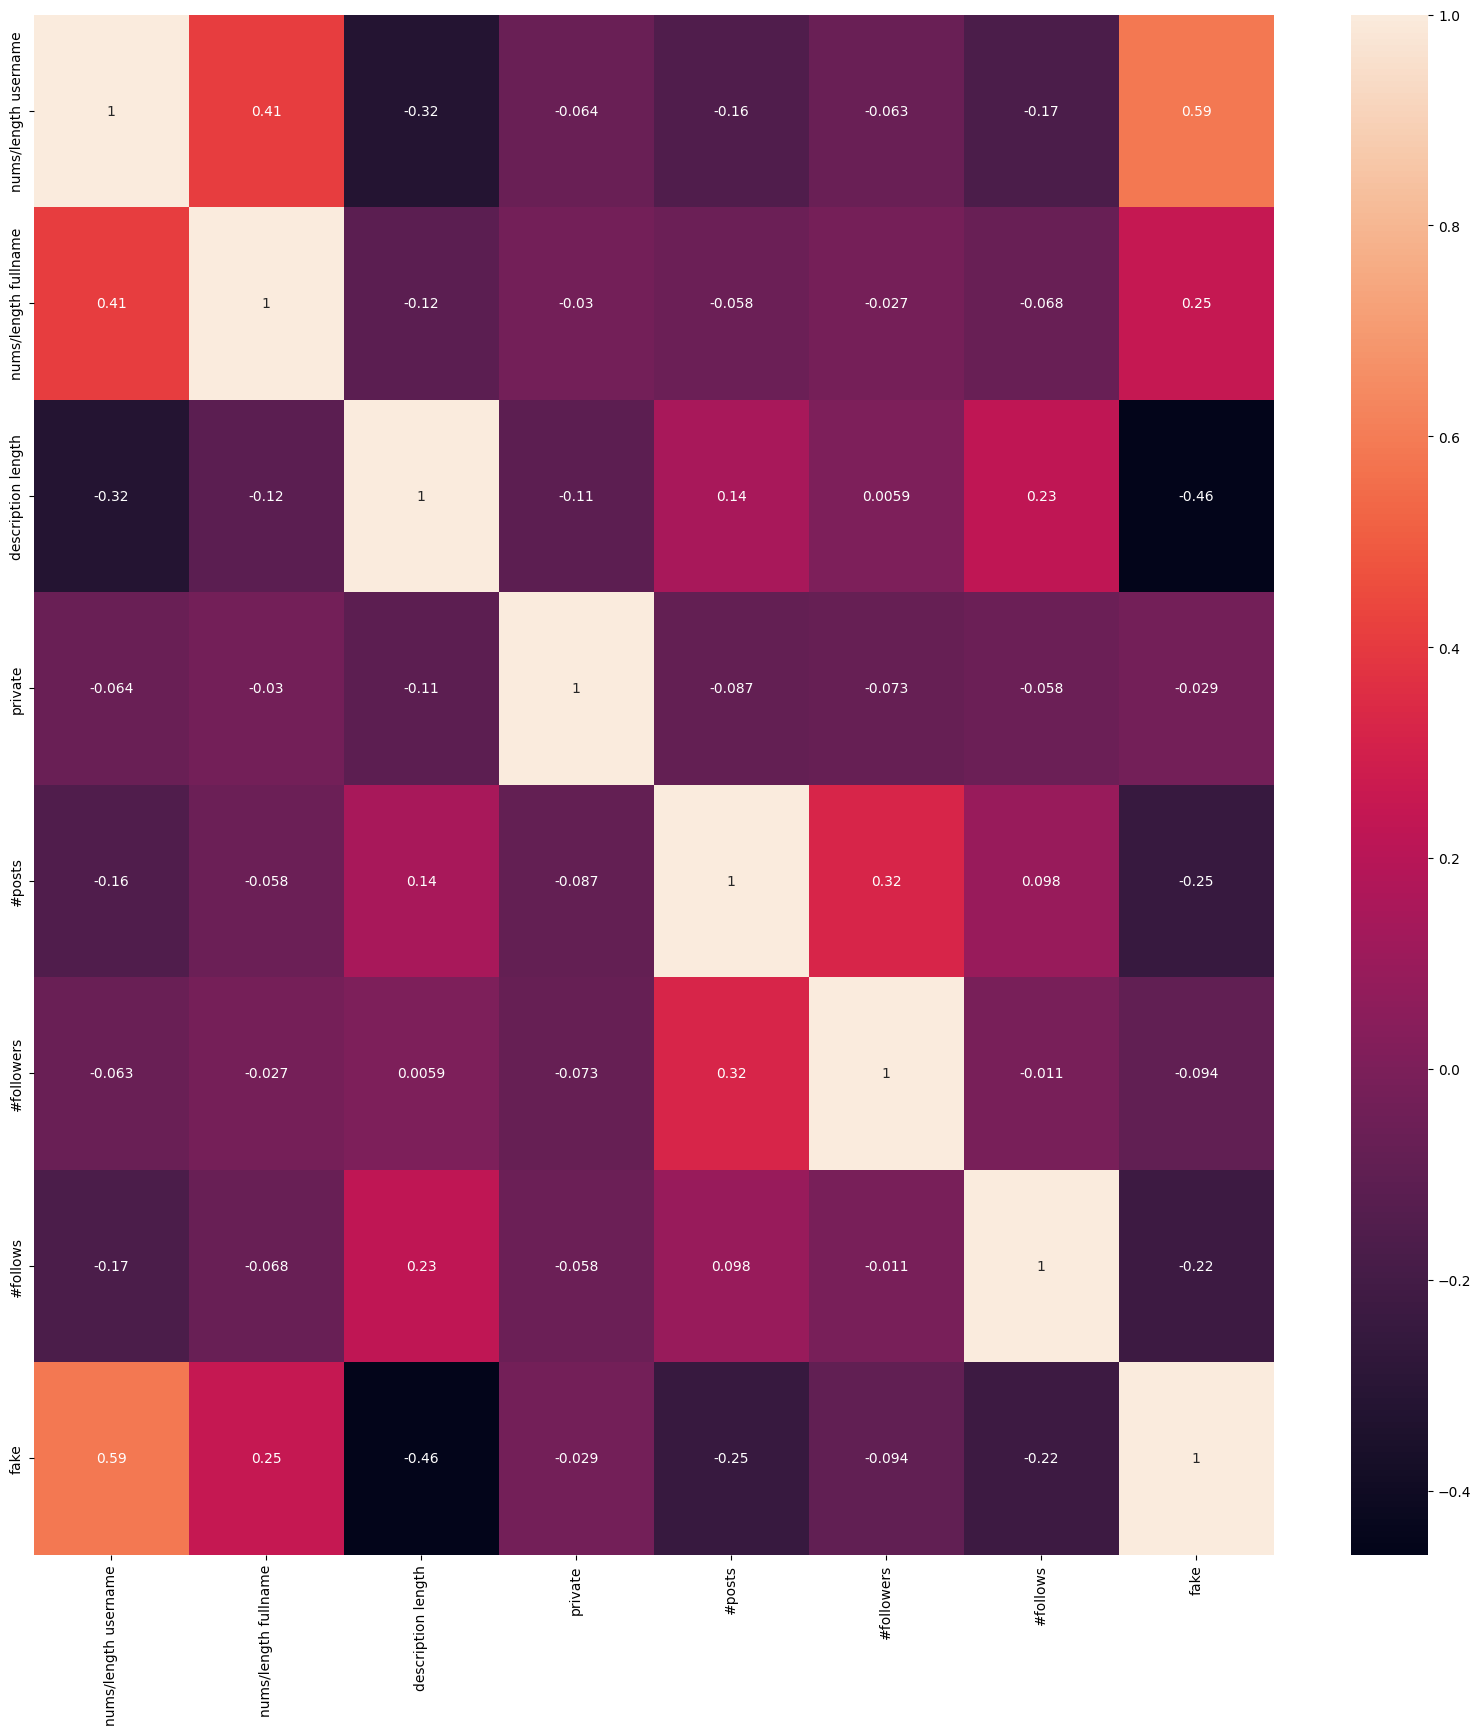

In [62]:
# Correlation plot
plt.figure(figsize=(20, 20))
cm = df_train.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
plt.show()

# Data Modelling

In [63]:
# Training and testing dataset (inputs)
X_train = df_train.drop(columns = ['fake'])
X_test = df_test.drop(columns = ['fake'])
X_train

,nums/length username,nums/length fullname,description length,private,#posts,#followers,#follows
0,0.27,0.00,53,0,32,1000,955
1,0.00,0.00,44,0,286,2740,533
2,0.10,0.00,0,1,13,159,98
3,0.00,0.00,82,0,679,414,651
4,0.00,0.00,0,1,6,151,126
...,...,...,...,...,...,...,...
571,0.55,0.44,0,0,33,166,596
572,0.38,0.33,21,0,44,66,75
573,0.57,0.00,0,0,4,96,339
574,0.57,0.00,11,0,0,57,73


In [64]:
# Training and testing dataset (Outputs)
y_train = df_train['fake']
y_test = df_test['fake']
y_train

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [65]:
# Scale the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [67]:
# Save the scaler
joblib.dump(scaler_x, 'numerical_scaler.pkl')


['numerical_scaler.pkl']

In [68]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 2)

In [69]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [70]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(50, input_dim=7, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 50)             │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 150)            │         7,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 150)            │        22,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 25)             │         3,775 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,527 (134.87 KB)

 Trainable params: 34,527 (134.87 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [72]:
epochs_hist = model.fit(X_train, y_train, epochs = 35,  verbose = 1, validation_split = 0.1)

Epoch 1/35
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5598 - loss: 0.6800 - val_accuracy: 0.8103 - val_loss: 0.5902
Epoch 2/35
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7952 - loss: 0.5431 - val_accuracy: 0.9310 - val_loss: 0.2966
Epoch 3/35
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8167 - loss: 0.4251 - val_accuracy: 0.9310 - val_loss: 0.2865
Epoch 4/35
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8430 - loss: 0.4058 - val_accuracy: 0.9310 - val_loss: 0.2862
Epoch 5/35
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8702 - loss: 0.3765 - val_accuracy: 0.9310 - val_loss: 0.2138
Epoch 6/35
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8382 - loss: 0.3716 - val_accuracy: 0.9138 - val_loss: 0.2343
Epoch 7/35
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8643 - loss: 0.3616 - val_accuracy: 0.9483 - val_loss: 0.1534
Epoch 8/35
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8635 - loss: 0.3658 - val_accuracy: 0.9310 - val_loss

# Model Validation and Results

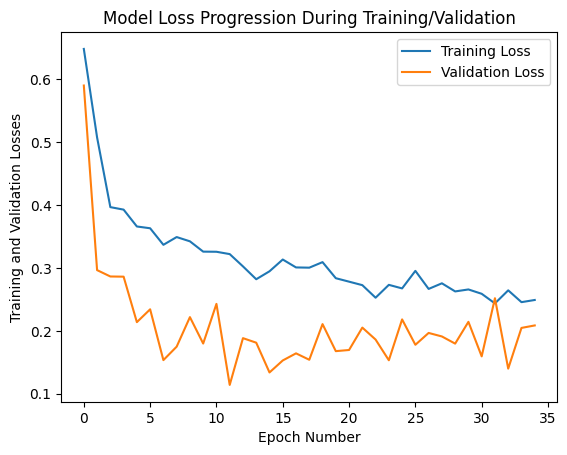

In [73]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [74]:
predicted = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [75]:
predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))
    
for i in y_test:
    test.append(np.argmax(i))

In [76]:
print(classification_report(test, predicted_value))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87        60
           1       0.83      0.97      0.89        60

    accuracy                           0.88       120
   macro avg       0.89      0.88      0.88       120
weighted avg       0.89      0.88      0.88       120



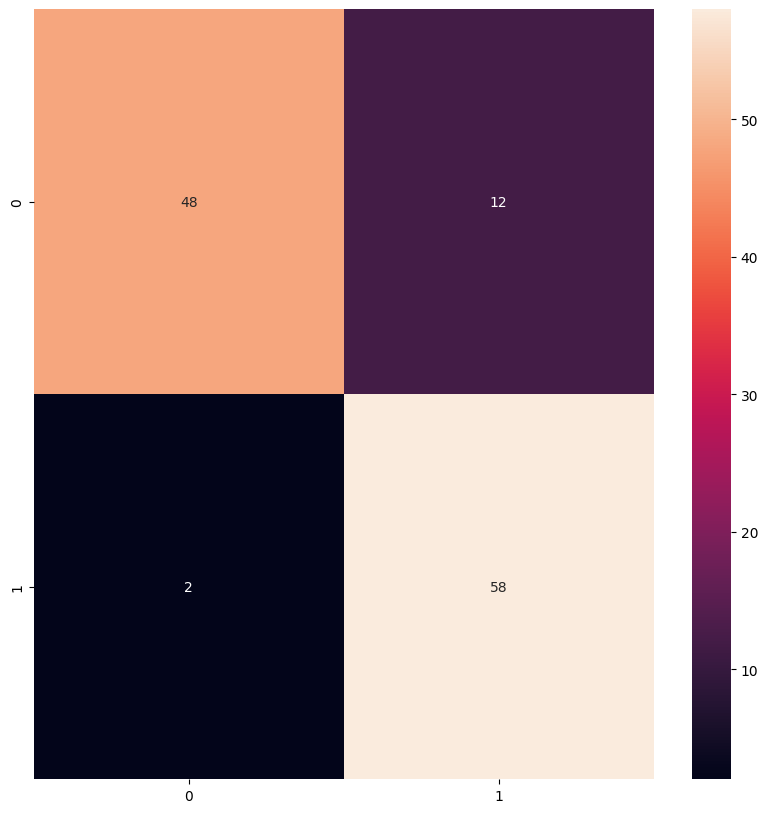

In [77]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(test, predicted_value)
sns.heatmap(cm, annot=True)
plt.show()

In [ ]:
# Define the Keras wrapper class
class KerasModelWrapper:
    def __init__(self, model):
        self.model = model  # Saved the actual Keras model here

    def predict_proba(self, X):
        return self.model.predict(X)  # Used the predict method from Keras


keras_model = model  

# Wrap the Keras model
wrapped_model = KerasModelWrapper(keras_model)

# Save the wrapped model using joblib
import joblib
joblib.dump(wrapped_model, 'keras_model_wrapper1.pkl')  # this file will have to be downloaded


['keras_model_wrapper1.pkl']

In [ ]:
# some verification code to see if model is properly stored 
wrapped_model = joblib.load('keras_model_wrapper1.pkl')
print(wrapped_model)  # This should show something like <__main__.KerasModelWrapper object at ...>
